# Comparando os dois modelos construídos

#### Todos os pacotes que usaremos nesta quarta parte

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
import scikitplot as skplt

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import binarize

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.rename(columns={'id':'ID', 'gender': 'Gênero', 'age': 'Idade', 'hypertension':'Hipertensão', 'heart_disease':'Doença cardíaca',
                   'ever_married':'Já casou','work_type':'Tipo de trabalho','Residence_type':'Tipo de residência',
                   'avg_glucose_level':'Nível médio de glicose','bmi':'IMC','smoking_status':'Tabagismo','stroke':'Derrame'}, inplace=True)

In [4]:
df.head()

,ID,Gênero,Idade,Hipertensão,Doença cardíaca,Já casou,Tipo de trabalho,Tipo de residência,Nível médio de glicose,IMC,Tabagismo,Derrame
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df["Gênero"] = df["Gênero"].str.replace("Male","Masculino")
df["Gênero"] = df["Gênero"].str.replace("Female","Feminino")
df["Gênero"] = df["Gênero"].str.replace("Other","Outro")

In [6]:
df["Já casou"] = df["Já casou"].str.replace("Yes","Sim")
df["Já casou"] = df["Já casou"].str.replace("No","Não")

In [7]:
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("children","Criança")
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("Govt_job","Serv_publi")
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("Never_worked","Nunca_trab")
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("Private","Privado")
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("Self-employed","Autônomo")

In [8]:
df["Tipo de residência"] = df["Tipo de residência"].str.replace("Urban","Urbana")

In [9]:
df["Tabagismo"] = df["Tabagismo"].str.replace("formerly smoked","Já fumou")
df["Tabagismo"] = df["Tabagismo"].str.replace("never smoked","Nunca fumou")
df["Tabagismo"] = df["Tabagismo"].str.replace("smokes","Fuma")
df["Tabagismo"] = df["Tabagismo"].str.replace("Unknown","Desconhecido")

In [10]:
df.head(6)

,ID,Gênero,Idade,Hipertensão,Doença cardíaca,Já casou,Tipo de trabalho,Tipo de residência,Nível médio de glicose,IMC,Tabagismo,Derrame
0,9046,Masculino,67.0,0,1,Sim,Privado,Urbana,228.69,36.6,Já fumou,1
1,51676,Feminino,61.0,0,0,Sim,Autônomo,Rural,202.21,NaN,Nunca fumou,1
2,31112,Masculino,80.0,0,1,Sim,Privado,Rural,105.92,32.5,Nunca fumou,1
3,60182,Feminino,49.0,0,0,Sim,Privado,Urbana,171.23,34.4,Fuma,1
4,1665,Feminino,79.0,1,0,Sim,Autônomo,Rural,174.12,24.0,Nunca fumou,1
5,56669,Masculino,81.0,0,0,Sim,Privado,Urbana,186.21,29.0,Já fumou,1


In [11]:
DT_IMC_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X1 = df[['Idade','Gênero','IMC','Nível médio de glicose']].copy()
X1['Gênero'] = X1['Gênero'].replace({'Masculino':0,'Feminino':1,'Outro':-1}).astype(np.uint8)

Missing = X1[X1['IMC'].isna()]
X1 = X1[~X1['IMC'].isna()]
Y1 = X1.pop('IMC')
DT_IMC_pipe.fit(X1,Y1)
#Usando vairáveis relacionadas com IMC para prevelo, 'Idade','Gênero','Nível médio de glicose'
predicted_IMC = pd.Series(DT_IMC_pipe.predict(Missing[['Idade','Gênero','Nível médio de glicose']]),index=Missing.index)
df.loc[Missing.index,'IMC'] = predicted_IMC

### Criando X, que terá as variáveis que utilizaremos, e y, que terá a variável preditora

In [12]:
X = df.drop(['ID','Derrame'],axis=1)
y = df['Derrame']

In [13]:
X.head()

,Gênero,Idade,Hipertensão,Doença cardíaca,Já casou,Tipo de trabalho,Tipo de residência,Nível médio de glicose,IMC,Tabagismo
0,Masculino,67.0,0,1,Sim,Privado,Urbana,228.69,36.6,Já fumou
1,Feminino,61.0,0,0,Sim,Autônomo,Rural,202.21,45.0,Nunca fumou
2,Masculino,80.0,0,1,Sim,Privado,Rural,105.92,32.5,Nunca fumou
3,Feminino,49.0,0,0,Sim,Privado,Urbana,171.23,34.4,Fuma
4,Feminino,79.0,1,0,Sim,Autônomo,Rural,174.12,24.0,Nunca fumou


### Usando o one hot enconding

In [14]:
X['Já casou'] = X['Já casou'].replace({'Não':0,'Sim':1}).astype(np.uint8)
X = pd.get_dummies(X, columns = ['Tipo de trabalho','Tabagismo','Gênero','Tipo de residência'])

In [15]:
X.head()

,Idade,Hipertensão,Doença cardíaca,Já casou,Nível médio de glicose,IMC,Tipo de trabalho_Autônomo,Tipo de trabalho_Criança,Tipo de trabalho_Nunca_trab,Tipo de trabalho_Privado,Tipo de trabalho_Serv_publi,Tabagismo_Desconhecido,Tabagismo_Fuma,Tabagismo_Já fumou,Tabagismo_Nunca fumou,Gênero_Feminino,Gênero_Masculino,Gênero_Outro,Tipo de residência_Rural,Tipo de residência_Urbana
0,67.0,0,1,1,228.69,36.6,0,0,0,1,0,0,0,1,0,0,1,0,0,1
1,61.0,0,0,1,202.21,45.0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
2,80.0,0,1,1,105.92,32.5,0,0,0,1,0,0,0,0,1,0,1,0,1,0
3,49.0,0,0,1,171.23,34.4,0,0,0,1,0,0,1,0,0,1,0,0,0,1
4,79.0,1,0,1,174.12,24.0,1,0,0,0,0,0,0,0,1,1,0,0,1,0


## Comparação entre os modelos

### Treinando os modelos

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
rus = RandomUnderSampler(random_state=42)

X_train_rf, y_train_rf = rus.fit_resample(X_train, y_train)

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),
                                ('RF',RandomForestClassifier(n_estimators= 950,min_samples_split= 5,
                                                             min_samples_leaf= 1,max_features= 'sqrt',
                                                             max_depth= 30,bootstrap= True,random_state=42))])

rf_pipeline.fit(X_train_rf,y_train_rf)

downsampled_pred_rf = rf_pipeline.predict(X_test)

In [18]:
ros = RandomOverSampler(random_state=42)

logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=0.004772,penalty='l1',
                                                                                        solver= 'liblinear',random_state=42))])

X_train_rl, y_train_rl = ros.fit_resample(X_train, y_train)

logreg_pipeline.fit(X_train_rl,y_train_rl)

logreg_tuned_pred = logreg_pipeline.predict(X_test)

### Alterando o threshold do random forest

#### Função que da as medidas dos modelos random forest dado um conjunto de dados e um threshold

In [19]:
def mod_threshold_rf(X_test, threshold):
    y_pred1_rf = rf_pipeline.predict_proba(X_test)[:,1]
    y_pred1_rf = y_pred1_rf.reshape(-1,1)
    y_pred2_rf = binarize(y_pred1_rf, threshold = threshold)#0.091  = 100%, 0.227 = 95% 0.32 = 90% ótimo = 0.5315
    y_pred2_rf = np.where(y_pred2_rf == 1, 1, 0)

    rf_df = pd.DataFrame(data=[accuracy_score(y_test, y_pred2_rf),
                               precision_score(y_test, y_pred2_rf),recall_score(y_test, y_pred2_rf),
                               f1_score(y_test,y_pred2_rf),roc_auc_score(y_test, y_pred2_rf)], 
                 columns=['Random Forest'],
                 index=["Acurácia", "Precisão", "Recall","F1-score", "ROC AUC Score"])
    return rf_df

### Alterando o threshold da regressão logística

#### Função que da as medidas dos modelos regressão logística dado um conjunto de dados e um threshold

In [20]:
def mod_threshold_rl(X_test, threshold):
    y_pred1_rl = logreg_pipeline.predict_proba(X_test)[:,1]
    y_pred1_rl = y_pred1_rl.reshape(-1,1)
    y_pred2_rl = binarize(y_pred1_rl, threshold = threshold)#0.252  = 100%, 0.336 = 95% 0.427 = 90%, ótimo = 0.4982
    y_pred2_rl = np.where(y_pred2_rl == 1, 1, 0)

    rl_df = pd.DataFrame(data=[accuracy_score(y_test, y_pred2_rl),
                               precision_score(y_test, y_pred2_rl),recall_score(y_test, y_pred2_rl),
                               f1_score(y_test,y_pred2_rl),roc_auc_score(y_test, y_pred2_rl)], 
                 columns=['Regressão Logística'],
                 index=["Acurácia", "Precisão", "Recall","F1-score", "ROC AUC Score"])
    return rl_df

### Plot comparando as métricas dos modelos com o threshold modificado

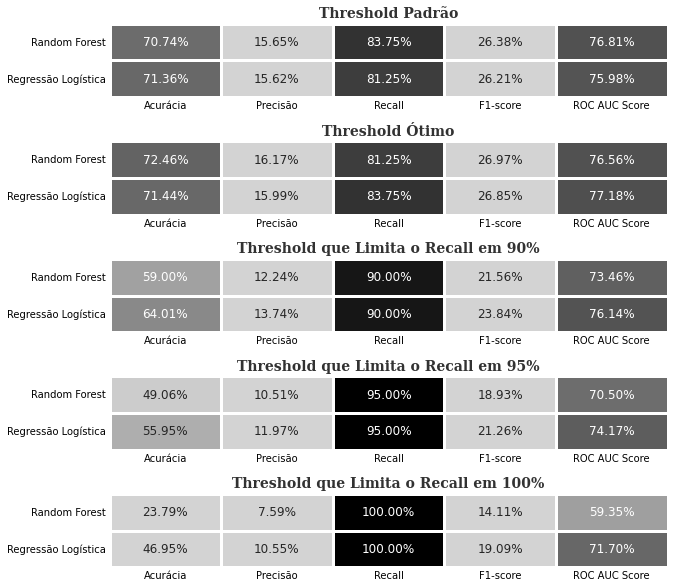

In [21]:
import matplotlib
colors = ["lightgray","lightgray","#000000"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#ffffff"

fig, ax = plt.subplots(5,1, figsize=(10, 10), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .6, wspace=.1)

ax = ax.ravel()

titulos = ['Threshold Padrão','Threshold Ótimo','Threshold que Limita o Recall em 90%',
           'Threshold que Limita o Recall em 95%','Threshold que Limita o Recall em 100%']
threshold_rf = [0.5, 0.5315, 0.32, 0.227, 0.091]
threshold_rl = [0.5, 0.4982, 0.427, 0.336, 0.252]

for i in range(0,5):
    rf_df = mod_threshold_rf(X_test, threshold_rf[i])
    rl_df = mod_threshold_rl(X_test, threshold_rl[i])
    df_models = round(pd.concat([rf_df,rl_df], axis=1),4)
    sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".2%",vmin=0,vmax=0.95,
                linewidths=2.5,cbar=False,ax=ax[i],annot_kws={"fontsize":12})
    fig.patch.set_facecolor(background_color) # figure background color
    ax[i].set_facecolor(background_color) 

    ax[i].set_title(titulos[i],loc='center', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
    ax[i].tick_params(axis=u'both', which=u'both',length=0)

#fig.suptitle('Comparação dos Modelos',fontsize=16, fontweight='bold', fontfamily='serif', color="#000000")

plt.show()